Repeat iteration 1 using data from just 40-80% loads

In [1]:
import pandas as pd
import sys
sys.path.append(r"C:\Users\silvh\OneDrive\lighthouse\custom_python")
from silvhua import *
import seaborn as sns
import matplotlib.pyplot as plt
from silvhua_plot import *
from PIL import Image
import numpy as np
import re
sys.path.append(r"C:\Users\silvh\OneDrive\lighthouse\projects\lighthouse-capstone-project\src")
from processing_functions import *
from plot_functions import *
from capstone_modelling import *
from model_evaluation import *

# from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
# from sklearn import linear_model

# Load data & engineer features

In [2]:
path = r'C:\Users\silvh\OneDrive\lighthouse\projects\lighthouse-capstone-project\data'
df_fw = load_csv('data_freeweight_corrected.csv',path, column1_as_index=False)
df_sm = load_csv('data_sm.csv',path, column1_as_index=False)

df_fw2 = individual_regression2(df_fw, [40, 60, 80])
df_sm2 = individual_regression2(df_sm, [40, 60, 80])
df_fw2.head(3)

Dataframe shape:  (52, 15)
Dataframe shape:  (52, 15)
Dataframe shape:  (52, 18)
Dataframe shape:  (52, 18)


,Age,Mass,Height,Load20%1RM,Load40%1RM,Load60%1RM,Load80%1RM,Load90%1RM,Load-1RM-1,20% MV,40%MV,60%MV,80%MV,90%MV,100%MV,slope,intercept,group MVT
0,22.0,77.8,175.0,39.0,78.0,114.0,156.0,175.0,190.0,1.05,0.91,0.76,0.52,0.39,0.26,-197.674419,260.302326,0.275192
1,21.0,71.6,179.0,24.0,48.0,72.0,96.0,108.0,120.0,1.03,0.91,0.68,0.49,0.39,0.27,-113.941221,150.999246,0.275192
2,19.0,60.8,165.0,26.0,52.0,78.0,104.0,117.0,130.0,1.06,0.92,0.76,0.51,0.37,0.26,-124.824356,169.121780,0.275192


## Figure for presentation

Original shape:  (52, 15)
New shape:  (312, 6)


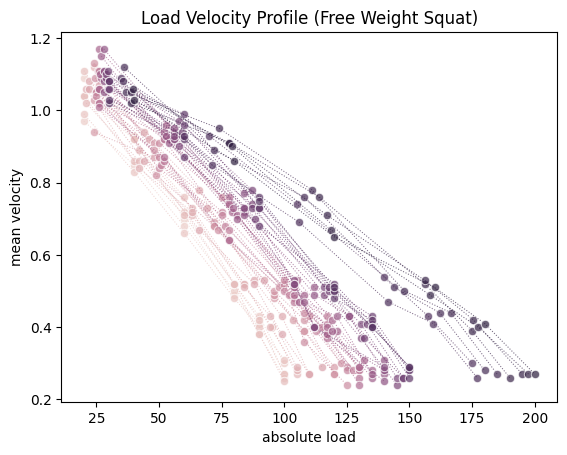

In [3]:
fig, ax = plt.subplots()
sns.lineplot(data=reshape_group_df_lr2(df_fw, [40, 60, 80]), x='absolute load', y='mean velocity',
    hue='participant', alpha=.7,marker='o', size=0.5, ls=':',
    legend=False, ax=ax
)
ax.set_title('Load Velocity Profile (Free Weight Squat)')
fig.savefig('../output/figures/EDA figures/MV_vs_load_FW.png')

Original shape:  (8, 15)
New shape:  (48, 6)


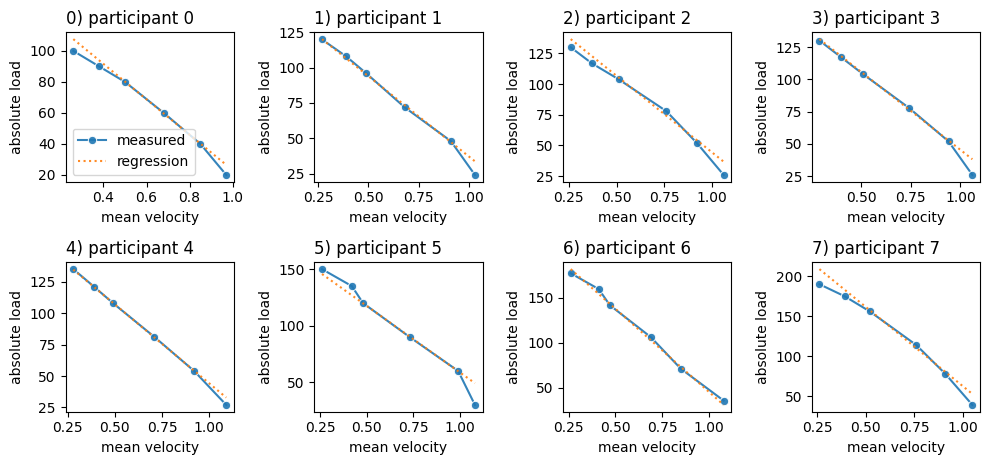

In [4]:
loads = [40, 60, 80]
sns.reset_defaults()    
%matplotlib inline
plot_profiles_lr(reshape_group_df_lr2(pd.concat([df_fw.head(4), df_fw.tail(4)]), loads), 
        # title=f'FW Squat Load-Velocity Profiles Using {loads[0]}%, {loads[1]}% & {loads[2]}% 1RM', 
        show_legend=True).savefig(f'../output/figures/EDA figures/04 iteration sample LV profiles FW.png')

# Check statistics

Original shape:  (52, 15)
New shape:  (312, 6)
Original shape:  (52, 15)
New shape:  (312, 6)


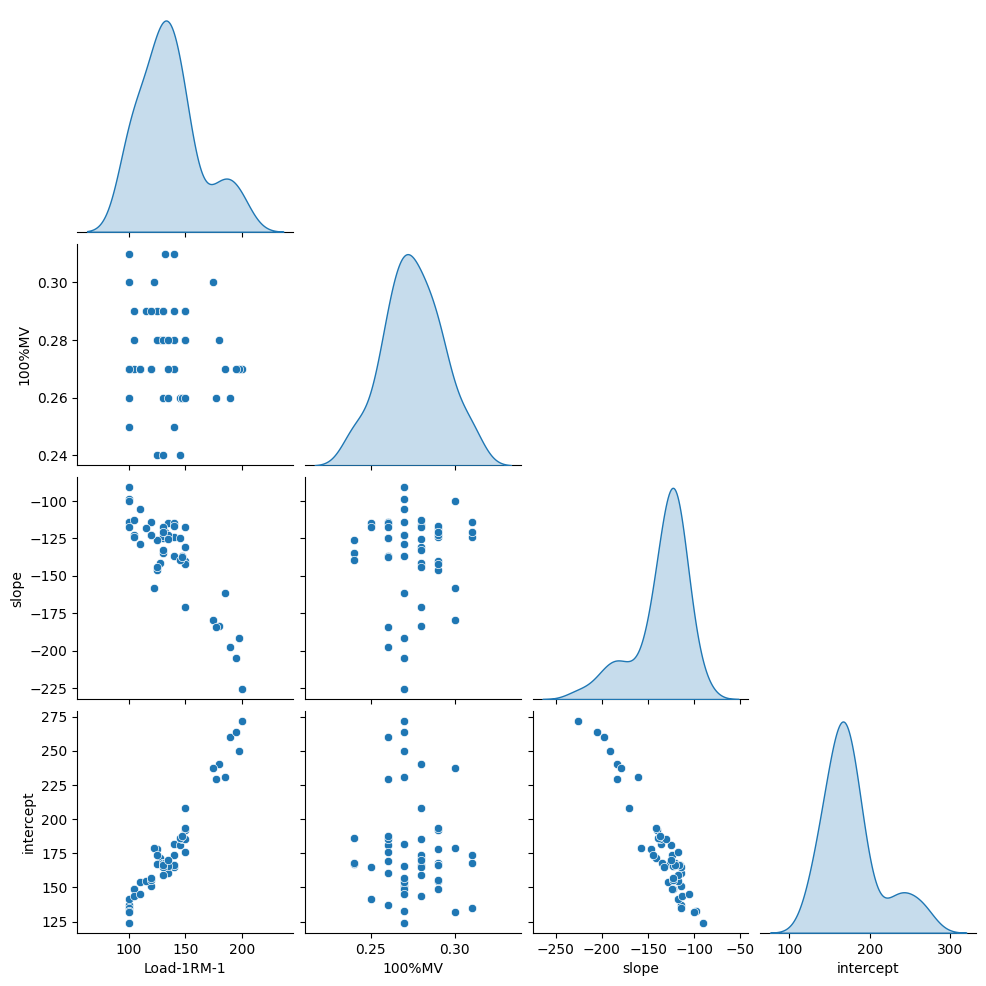

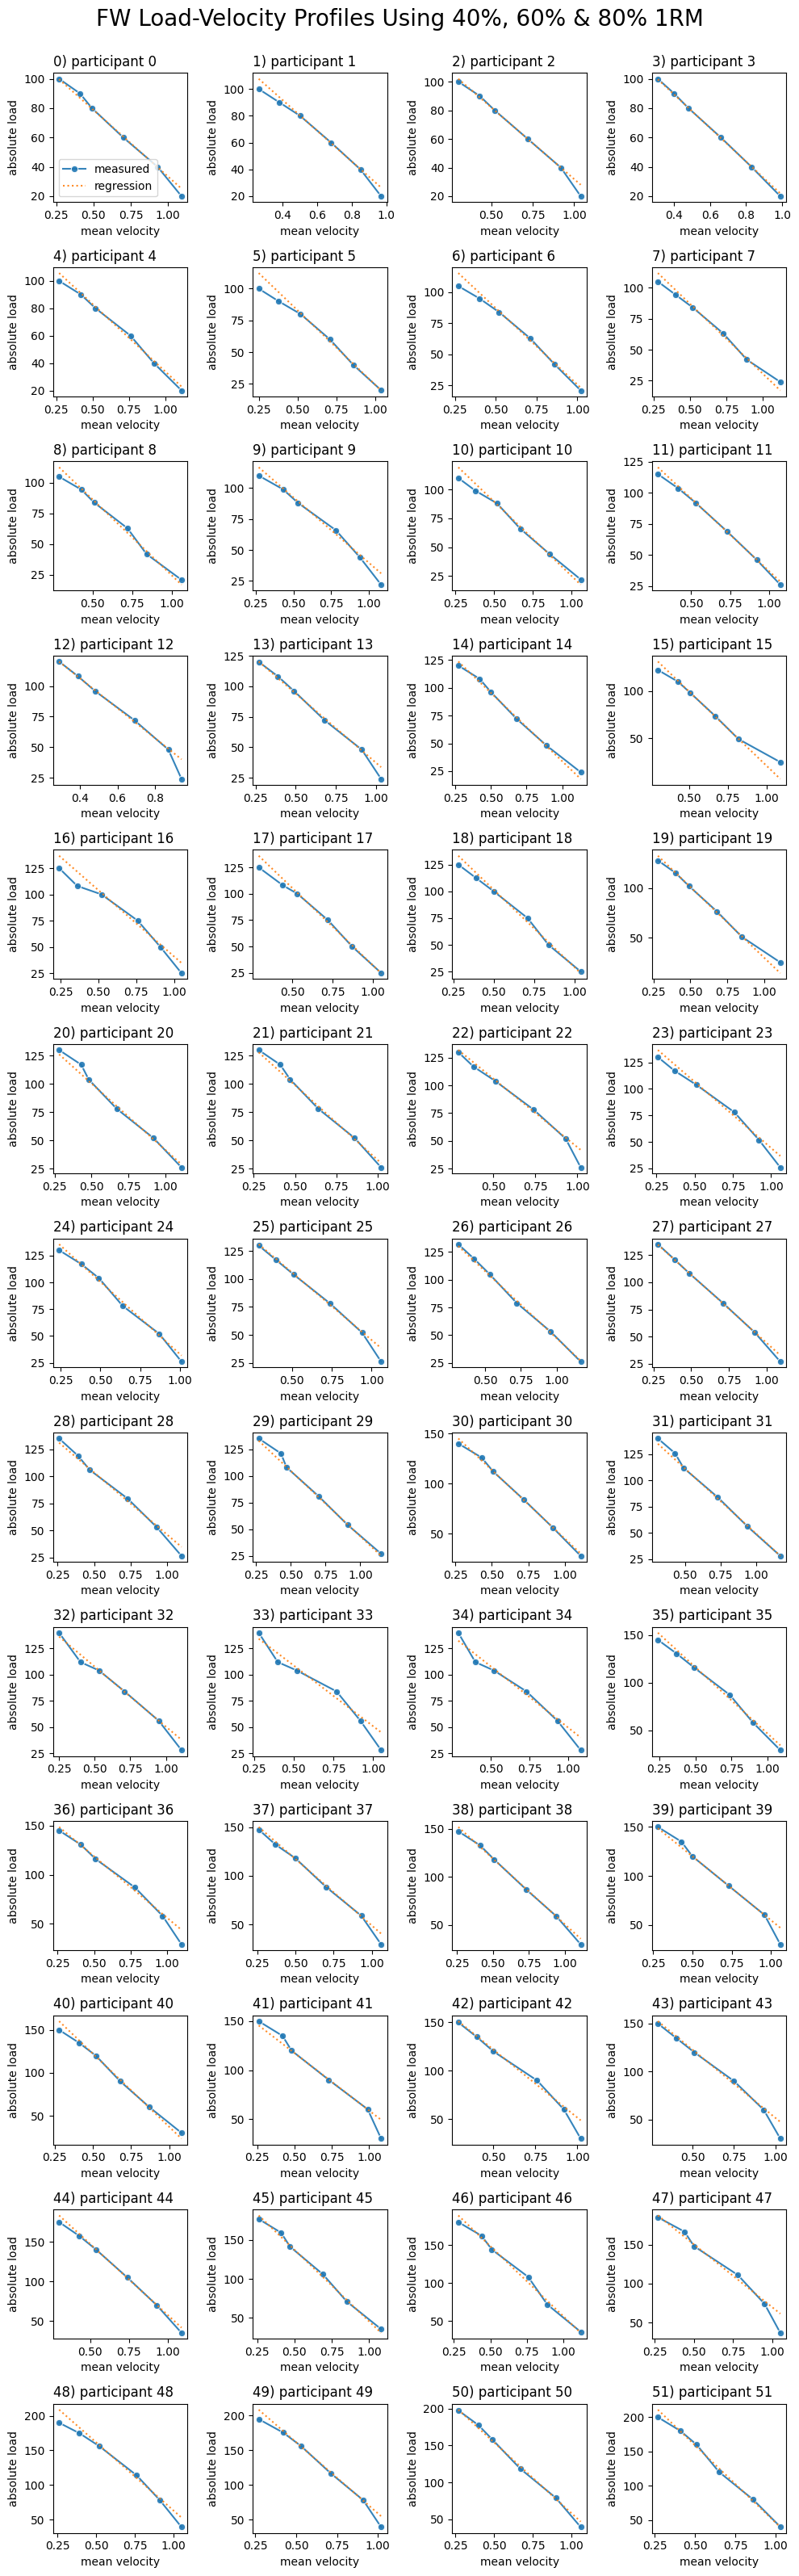

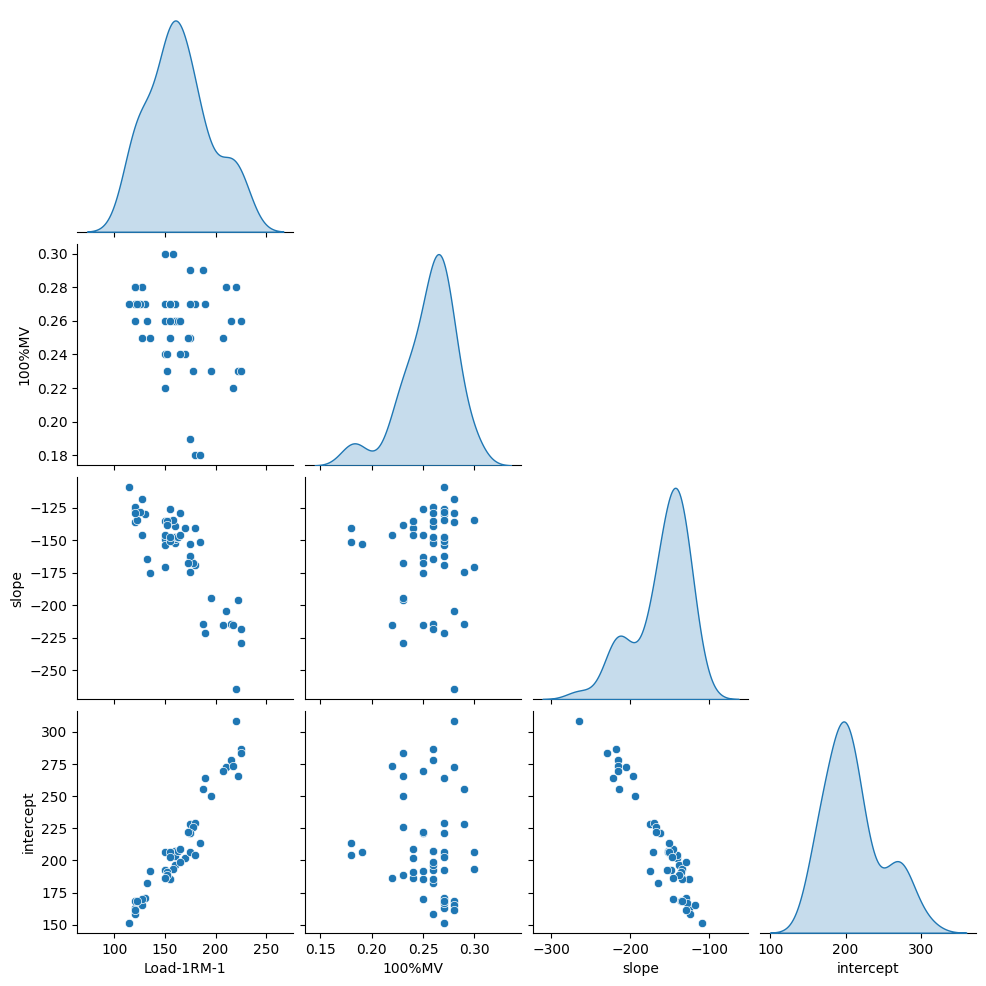

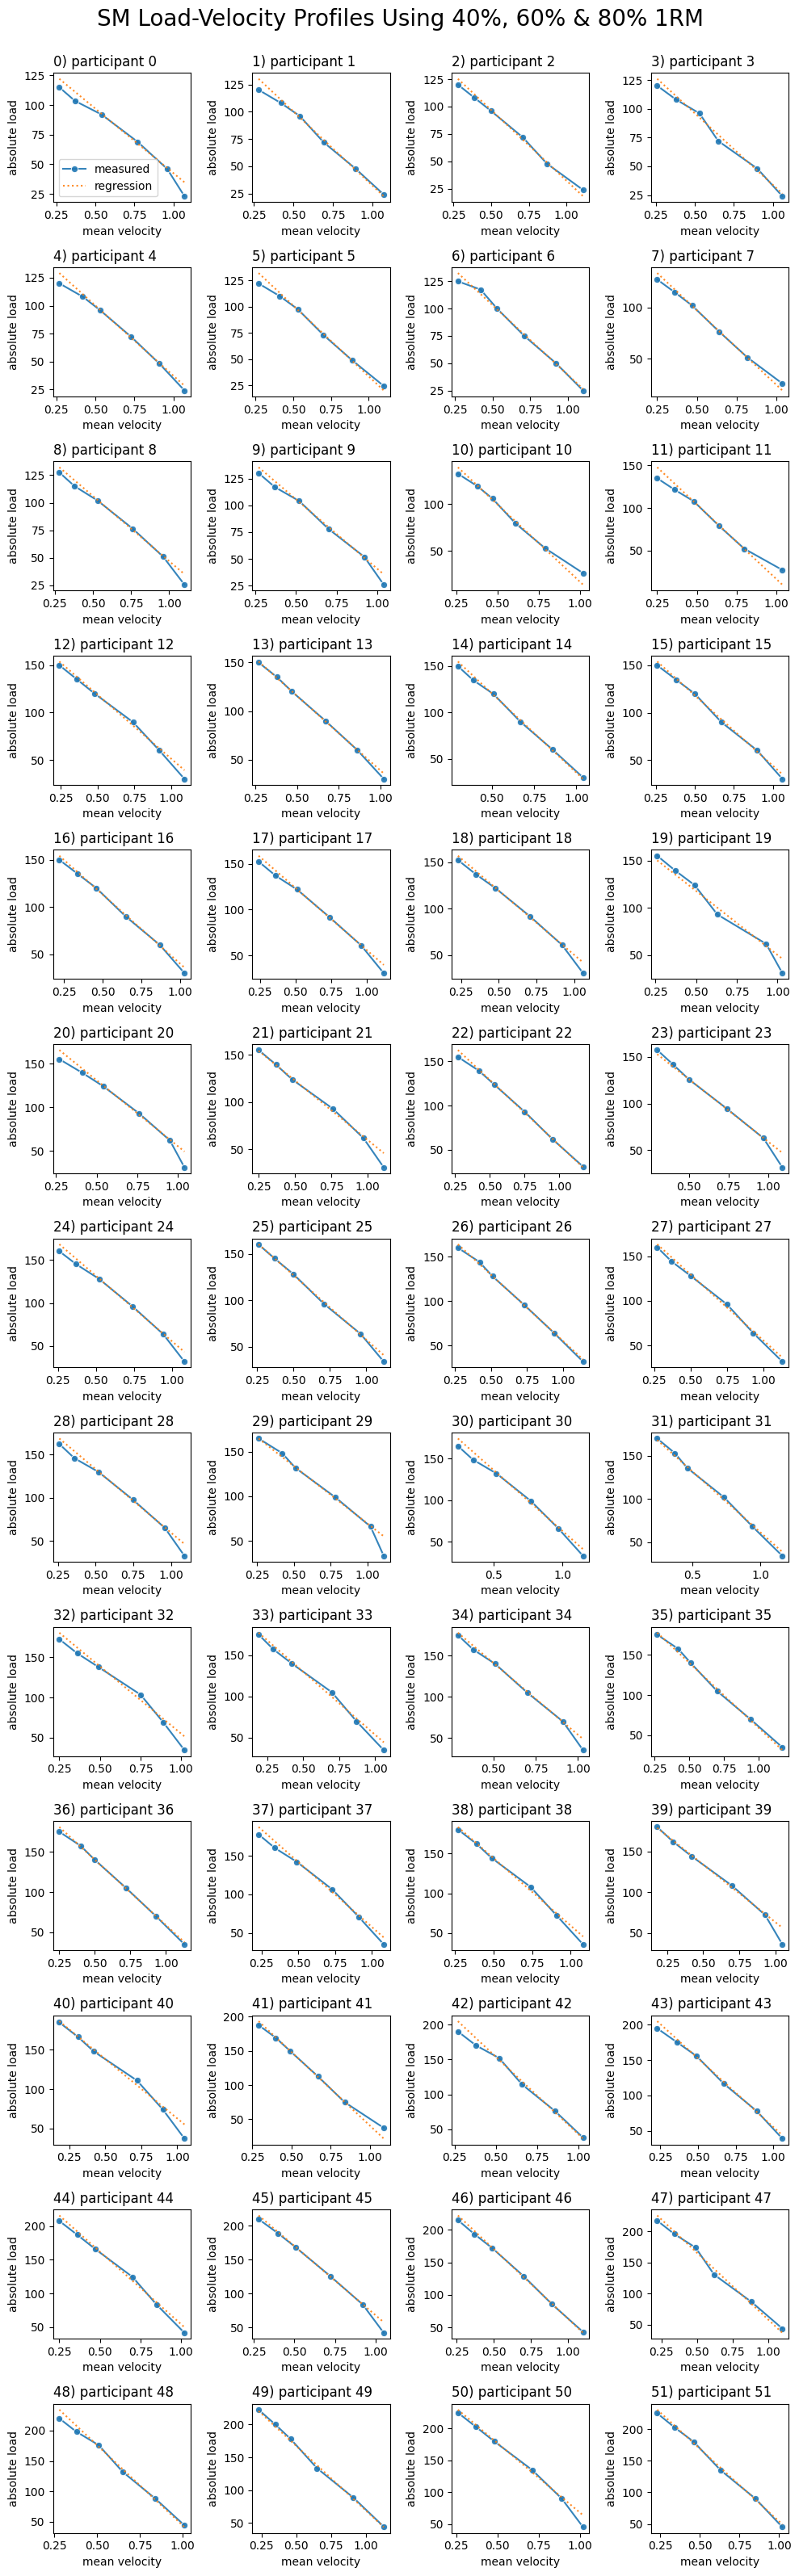

In [5]:
shapiro = pd.DataFrame()
df_dict0 = {'FW': df_fw, 'SM': df_sm}
df_dict = {'FW': df_fw2, 'SM': df_sm2}

def run_eda(df, columns=['Load-1RM-1','100%MV', 'slope', 'intercept'], mode=None,
    filepath=None):
    """
    Create a pairplot.
    Perform shapiro-wilks test.
    """
    stats = run_stats(df, columns=columns, mode=mode)
    pairplot = sns.pairplot(df[columns], diag_kind='kde', corner=True)

    if filepath:
        pairplot.savefig(f'{filepath} pairplot.png')

    return stats

pairplot_dict = {}
LV_profile_dict = dict()
loads = [40, 60, 80]
for name, df in df_dict.items():
    shapiro[name] = run_eda(df, filepath=f'../output/figures/04 iteration {name}')
    plot_profiles_lr(reshape_group_df_lr2(df_dict0[name], loads), 
        title=f'{name} Load-Velocity Profiles Using {loads[0]}%, {loads[1]}% & {loads[2]}% 1RM', 
        show_legend=True).savefig(f'../output/figures/04 iteration LV profiles {name}.png')

In [6]:
shapiro

,FW,SM
normal Load-1RM-1,0.002,0.023
normal 100%MV,0.070,0.001
normal slope,0.000,0.000
normal intercept,0.000,0.003


# Model


Stat Ind MVT evaluation metrics: 
		Model of interest	Baseline	Difference
RMSE: 			6.80		6.80		0.00
MAE: 			5.49		5.49		0.00
mean error: 		3.86		3.86		0.00
R^2: 			0.94		0.94		0.00
Pearson r statistic: 	0.98		0.98		0.00
			p=0.00		p=0.00

predictions mean: 	140.13		140.13		0.00
predictions std: 	28.27		28.27		0.00

target mean: 136.28
target std: 27.07

Stat Grp MVT evaluation metrics: 
		Model of interest	Baseline	Difference
RMSE: 			6.65		6.80		-0.14
MAE: 			5.35		5.49		-0.14
mean error: 		3.83		3.86		-0.03
R^2: 			0.94		0.94		0.00
Pearson r statistic: 	0.98		0.98		0.00
			p=0.00		p=0.00

predictions mean: 	140.11		140.13		-0.03
predictions std: 	27.90		28.27		-0.37

target mean: 136.28
target std: 27.07

OLS evaluation metrics: 
		Model of interest	Baseline	Difference
RMSE: 			3.89		6.80		-2.91
MAE: 			3.24		5.49		-2.25
mean error: 		-0.00		3.86		-3.86
R^2: 			0.98		0.94		0.04
Pearson r statistic: 	0.99		0.98		0.01
			p=0.00		p=0.00

predictions mean: 	136.28		140.13		-3.86
predict

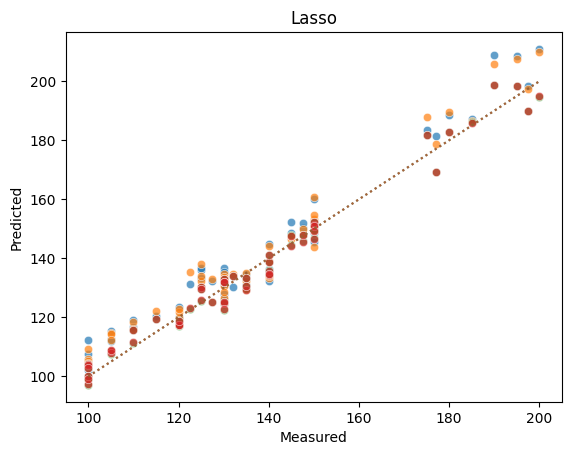

In [7]:
stat_models_dict = {
    'Stat Ind MVT': 'individual',
    'Stat Grp MVT': 'group'
}
ml_models_dict = {
    'OLS': LinearRegression(),
    'Lasso': LassoCV(cv=5, random_state=0)
}
predictions_fw = pd.DataFrame()
predictions_sm = pd.DataFrame()
metrics_fw = pd.DataFrame()
metrics_sm = pd.DataFrame()

def run_all_models(stat_models_dict, ml_models_dict, df, x_columns=['slope', 'intercept'], pickle_name=None,
    path=r'C:\Users\silvh\OneDrive\lighthouse\projects\lighthouse-capstone-project\output'):
    """2022-12-02 23:59 See `2022-12-02 iteration 4` notebook

    Run models 1-4 for single dataframe.
    """
    # Initialize dataframes for storing model outputs
    predictions = pd.DataFrame()
    coefficients = pd.DataFrame()
    cv_metrics = pd.DataFrame()
    stats = pd.DataFrame()
    
    # Add true y value
    predictions['Measured'] = df['Load-1RM-1']

    for model, mvt_param in stat_models_dict.items():
        predictions[model], fig = stat_modelling(df, model, mvt=mvt_param)
    for model, model_instance in ml_models_dict.items():
        predictions[model], fig, coefficients[model] = model_data_vs_stat(
            df, x_columns, model=model_instance, model_name=model
        )
        # cross-validation metrics
        cv_metrics[model] = evaluate_with_cv(df, x_columns, 
            model=model_instance, model_name=model)

        # ttest and Cohen's d effect size
        stats[model] = compare_means(
                df['Load-1RM-1'], # True y value
                predictions[model], type='paired') # Model predicts

        # Concatenate
        metrics = pd.concat([cv_metrics, 
            stats, 
            coefficients
            ], axis=0)
        metrics = round(metrics, 4)
        # pickle the model
        if pickle_name:
            savepickle(model_instance, f'{pickle_name} {model}', path=path+'\models')
    # save predictions and metrics
    if pickle_name:
        save_csv(predictions, f'{pickle_name} predictions', path=path+'\predictions')
        save_csv(metrics, f'{pickle_name} metrics and coefficients', path=path+'\models')

    return predictions, metrics, ml_models_dict

predictions_fw, metrics_fw, ml_models_dict = run_all_models(stat_models_dict, ml_models_dict, 
    df_fw2, x_columns=['slope', 'intercept'], pickle_name='04 iteration FW',
    path=r'C:\Users\silvh\OneDrive\lighthouse\projects\lighthouse-capstone-project\output')

In [9]:
# check that saved pickle will load
loaded = loadpickle('04 iteration FW Lasso.sav', r'C:\Users\silvh\OneDrive\lighthouse\projects\lighthouse-capstone-project\output\models')
loaded.predict(df_fw2.head(2)[['slope', 'intercept']])

array([198.71543525, 117.47242217])


Stat Ind MVT evaluation metrics: 
		Model of interest	Baseline	Difference
RMSE: 			6.77		6.77		0.00
MAE: 			5.86		5.86		0.00
mean error: 		5.28		5.28		0.00
R^2: 			0.95		0.95		0.00
Pearson r statistic: 	0.99		0.99		0.00
			p=0.00		p=0.00

predictions mean: 	169.50		169.50		0.00
predictions std: 	30.88		30.88		0.00

target mean: 164.22
target std: 30.73

Stat Grp MVT evaluation metrics: 
		Model of interest	Baseline	Difference
RMSE: 			8.32		6.77		1.55
MAE: 			7.10		5.86		1.24
mean error: 		5.27		5.28		-0.00
R^2: 			0.93		0.95		-0.03
Pearson r statistic: 	0.98		0.99		-0.01
			p=0.00		p=0.00

predictions mean: 	169.49		169.50		-0.00
predictions std: 	30.23		30.88		-0.65

target mean: 164.22
target std: 30.73

OLS evaluation metrics: 
		Model of interest	Baseline	Difference
RMSE: 			5.29		6.77		-1.48
MAE: 			4.32		5.86		-1.54
mean error: 		0.00		5.28		-5.28
R^2: 			0.97		0.95		0.02
Pearson r statistic: 	0.98		0.99		-0.01
			p=0.00		p=0.00

predictions mean: 	164.22		169.50		-5.28
predict

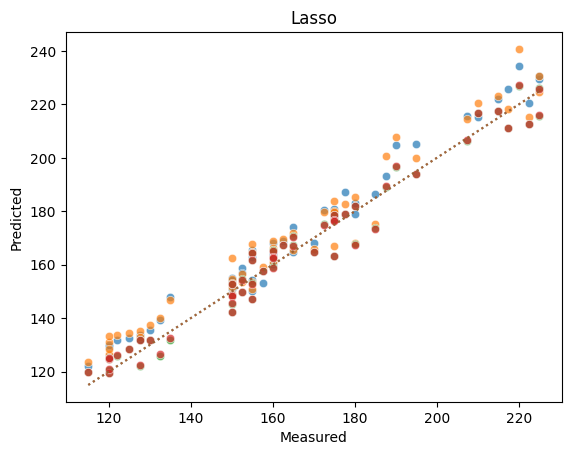

In [10]:
predictions_sm, metrics_sm, ml_models_dict_sm = run_all_models(stat_models_dict, ml_models_dict, 
    df_sm2, x_columns=['slope', 'intercept'], pickle_name='04 iteration SM',
    path=r'C:\Users\silvh\OneDrive\lighthouse\projects\lighthouse-capstone-project\output')

Metrics dataframe shape (free weight data): (416, 3)
Metrics dataframe shape (Smith machine data): (416, 3)


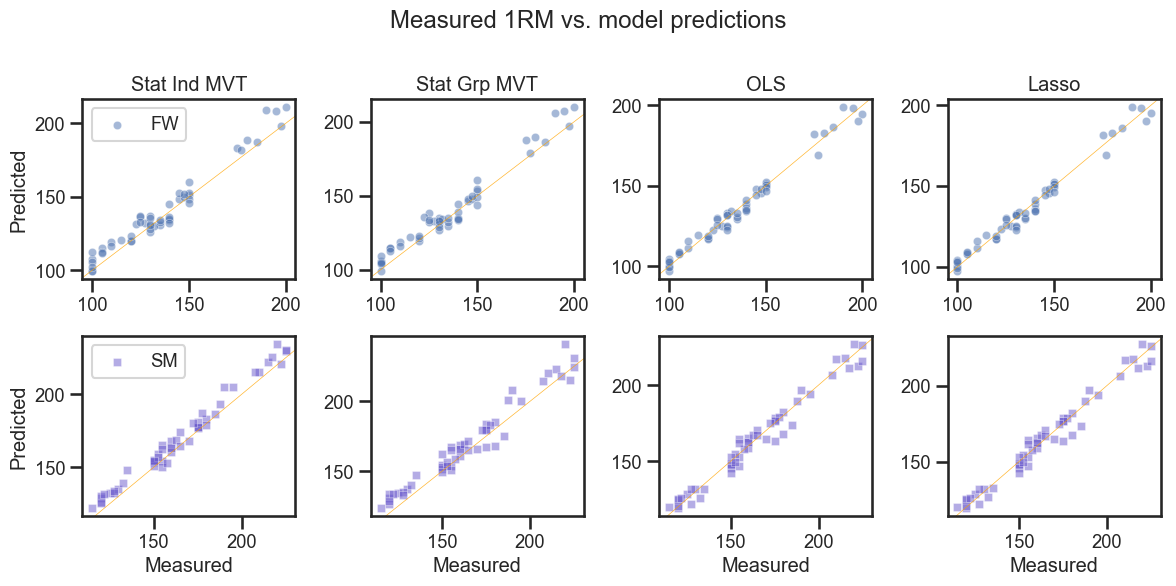

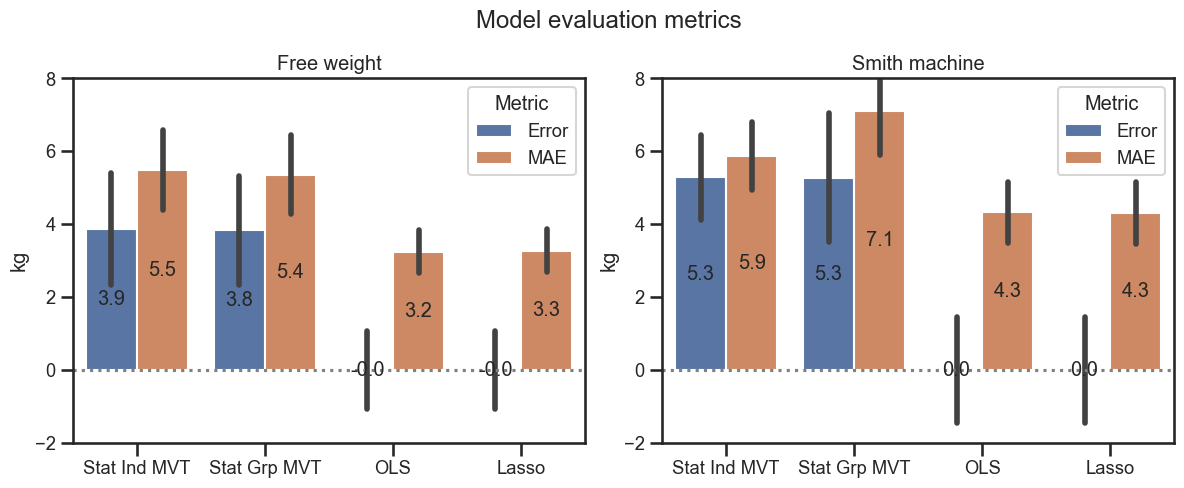

In [11]:
scatterplot, error_plot, _, _ = compare_models(predictions_fw, 
    predictions_sm, context='talk', ymin=-2, ymax=8, title='Measured 1RM vs. model predictions')

scatterplot.savefig('../output/figures/04 Iteration Measured vs predicted for all samples.png')
error_plot.savefig('../output/figures/04 Iteration Error bar chart for all samples.png')
path = r'../output/predictions'
# save_csv(fw_metrics, 'free weight errors', path=path)
# save_csv(sm_metrics, 'smith machine errors', path=path)

In [12]:
metrics_fw

,OLS,Lasso
mae,3.4463,3.4688
r2,0.9700,0.9697
t statistic,0.0000,0.0000
ttest pvalue,1.0000,1.0000
Cohens d,0.0000,0.0000
LV slope,0.6757,0.6533
LV intercept,1.2618,1.2438
model intercept,3.9407,4.1046


In [13]:
predictions_sm.head()

,Measured,Stat Ind MVT,Stat Grp MVT,OLS,Lasso
0,210.0,215.445678,220.448438,216.826852,216.645797
1,150.0,154.019851,154.678374,148.500254,148.574658
2,150.0,153.841962,151.740987,148.466085,148.398408
3,120.0,129.210332,131.030514,124.605950,124.737982
4,175.0,177.855953,183.874976,178.534960,178.511058


In [24]:
predictions_fw.head()

,Measured,Stat Ind MVT,Stat Grp MVT,OLS,Lasso
0,190.0,208.906977,205.903846,198.812957,198.715435
1,120.0,120.235117,119.643499,117.476501,117.472422
2,130.0,136.667447,134.771077,132.989254,132.902437
3,100.0,107.606094,105.870302,99.994711,100.244392
4,150.0,151.224036,153.300188,151.315727,151.163403


In [16]:
for dict in [ml_models_dict, ml_models_dict_sm]:
    print(f'Model alpha: {dict["Lasso"].alpha_}')
    print(f'Model CV iterations: {dict["Lasso"].n_iter_}')

Model alpha: 1.1104416225917766
Model CV iterations: 72
Model alpha: 1.1104416225917766
Model CV iterations: 72


# Plotting

## `compare_models2` function

Metrics dataframe shape (free weight data): (416, 3)


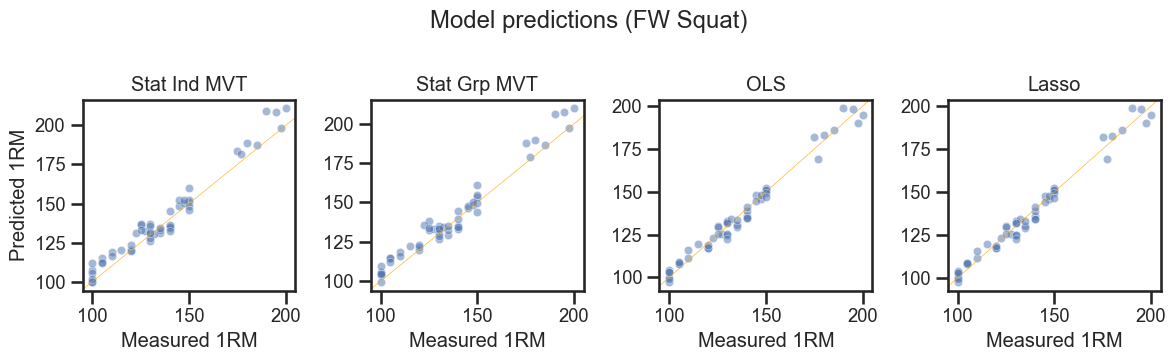

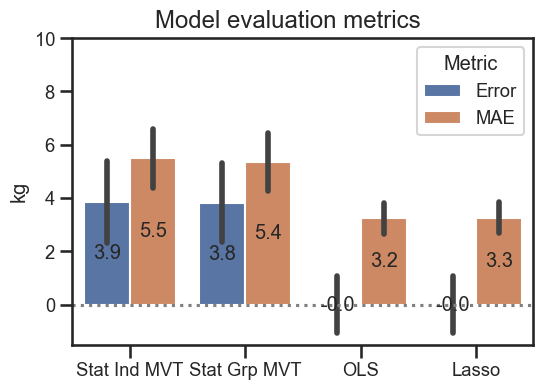

In [39]:
def compare_models2(predictions, title='Measured 1RM vs. model predictions', 
    context='talk', annotate=True, ymin=-1.5, ymax=10):
    """2022-12-02 23:53 from `2022-12-02 iteration 4` notebook

    Plot predictions from all the models for a dataset.
        Parameters:
            - predictions (DataFrame): 
                Dataframe that contains target data ('Measured' column) and model predictions
                (1 column per model).
            - title (str): Overall plot title.
            - context (None or str): Seaborn .set_theme() parameter. 
                One of {paper, notebook, talk (default), poster}. If None, set to 'default (notebook)'.
            - annotate (bool): Whether or not to annotate the bar graph with values. Default is True.
        Returns:
            - figure with scatter plots of measured vs. predicted values for all models.
            - figure with bar charts of mean absolute error and mean error for all models.
            - DataFrame containing:
                mean absolute error and mean error for all models.

    Command syntax:
        scatterplot, error_plot, metrics = compare_models2(predictions, 
        title='Model predictions', context='talk')

        scatterplot.savefig('../output/figures/Measured vs predicted.png')
        error_plot.savefig('../output/figures/Error bar chart.png')
        path = r'../output/predictions'
        save_csv(metrics, 'Model errors', path=path)
    """
    fw_models = predictions[predictions.columns[~predictions.columns.str.contains('Measured')]].columns.to_list()
    sns.reset_defaults()    
    %matplotlib inline
    font_scale=.8 if context=='talk' else 1
    rc={'lines.markersize': 6} if context=='talk' else None
    sns.set_theme(context=context, style='ticks', font_scale=font_scale, 
        rc=rc)
    if (len(fw_models) == 6) | (len(fw_models) == 3):
        ncols=3
        nrows = round((len(fw_models)+1)//3)
    else:
        nrows = round((len(fw_models)+1)/4)
        ncols=4
    if nrows > 1:
        fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*3, nrows*3.2))
    else:
        fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*3, nrows*3.7))
    ax = ax.flatten()
    fig2, ax2 = plt.subplots(nrows=1, ncols=1, figsize=(1.4*len(fw_models), 4))
    fw_error = pd.DataFrame()
    for index, model in enumerate(fw_models):
        # Calculate error
        fw_error[model] = predictions[model] - predictions['Measured'] 

        # Plot measured vs. predicted values for each model
        ax[index].axline(xy1=(150, 150), slope=1, alpha=0.8, linewidth=0.5, color='orange')
        if index == 0:
            ax[index].set_ylabel('Predicted') 
        sns.scatterplot(data=predictions, x='Measured', y=model, ax=ax[index],
            alpha=0.5, marker='o', legend=False, 
        ).set(xlabel=None, ylabel=None)
        ax[index].set_title(model)
        if index % ncols == 0:
            ax[index].set_ylabel('Predicted 1RM') 
        if index >= len(fw_models) -ncols:
            ax[index].set_xlabel('Measured 1RM') 
    fig.suptitle(title)
    fig.tight_layout(rect=[0, 0, 1, 0.98])
    fig2.tight_layout(rect=[0, 0, 1, 0.98])

    # Calculate remaining evaluation metrics and reshape dataframe for plotting
    fw_error['Metric'] = 'Error'
    fw_mae = abs(fw_error.iloc[:,:-1])
    fw_mae['Metric'] = 'MAE'
    fw_metrics = pd.concat([fw_error, fw_mae], axis=0).melt(
        value_vars=fw_models, id_vars=['Metric'], var_name='model')
    print(f'Metrics dataframe shape (free weight data): {fw_metrics.shape}')

    # Plot evaluation metrics: 
    sns.barplot(data=fw_metrics, y='value', x='model', hue='Metric', 
        errorbar=('se', 1.96), # error bars set to 95% confidence interval, or 1.96*standard error
        ax=ax2).set_ylim([ymin, ymax])
    ax2.axhline(y=0, ls=':', color='grey')
    ax2.set(ylabel='kg', xlabel=None)
    
    # Label bars with value
    if annotate:
        for i in ax2.containers:
                ax2.bar_label(i, fmt='%.1f', label_type='center') 
    # Titles and axis labels
    fig2.suptitle('Model evaluation metrics')
    return fig, fig2, fw_metrics

scatterplot, error_plot, metrics = compare_models2(predictions_fw, 
    title='Model predictions (FW Squat)', context='talk')

# scatterplot.savefig('../output/figures/Measured vs predicted.png')
# error_plot.savefig('../output/figures/Error bar chart.png')
# path = r'../output/predictions'
# save_csv(metrics, 'Model errors', path=path)

In [33]:
iter2_predictions = load_csv('02 iteration predictions.csv', filepath=r'../output/predictions/',
    column1_as_index=True)
iter2_predictions.head(3)

Dataframe shape:  (52, 11)


,LV 20-60,LV 20-80,LV 20-90,LV 40-60,LV 40-60-80,LV 40-60-80-90,LV 40-80,LV 60-80,LV 60-90,LV 80-90,Measured
0,195.507401,197.350598,188.319118,195.413912,198.812957,194.003028,197.153610,197.396051,192.019097,193.981152,190.0
1,114.450228,118.162019,119.788774,117.535411,117.476501,118.718647,119.164892,118.358085,118.314950,119.282740,120.0
2,140.399651,131.401621,126.308652,139.977943,132.989254,130.184262,131.717917,131.797101,129.706350,129.841625,130.0


Metrics dataframe shape (free weight data): (624, 3)


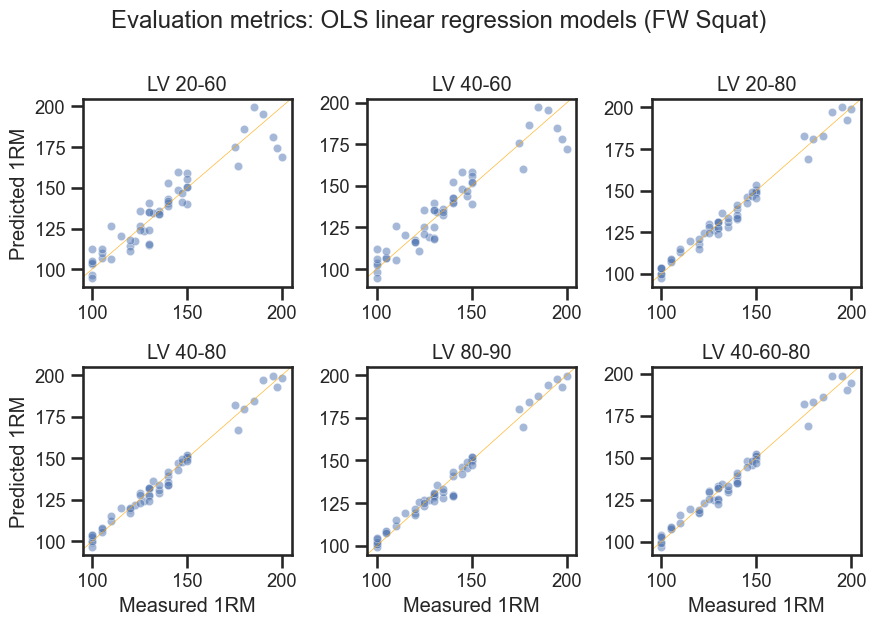

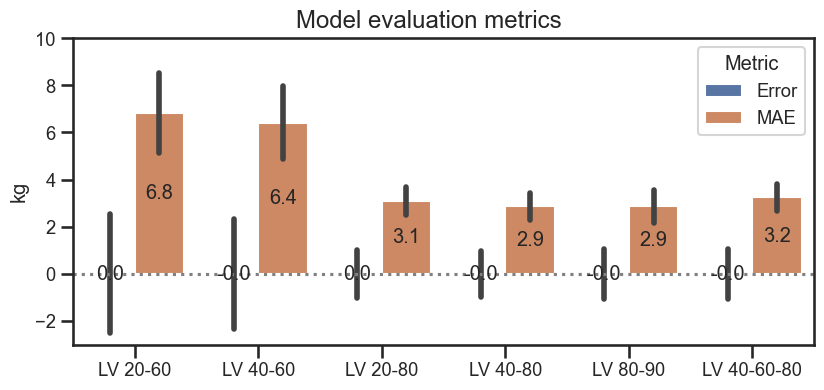

In [42]:
selected_models = ['LV 20-60', 'LV 40-60', 'LV 20-80', 'LV 40-80','LV 80-90', 'LV 40-60-80', 'Measured']
iter2_scatterplot, iter2_error_plot, metrics = compare_models2(iter2_predictions[selected_models], 
    title='Evaluation metrics: OLS linear regression models (FW Squat)', context='talk', ymin=-3)

iter2_scatterplot.savefig('../output/figures/02 iteration measured vs predicted for all samples SELECT MODELS.png')
iter2_error_plot.savefig('../output/figures/02 iteration error bar chart for all samples SELECT MODELS.png')

# *End of Page*